In [1]:
# 1.) What was the change in price of the stock over time?
# 2.) What was the daily return of the stock on average?
# 3.) What was the moving average of the various stocks?
# 4.) What was the correlation between different stocks' closing prices?
# 4.) What was the correlation between different stocks' daily returns?
# 5.) How much value do we put at risk by investing in a particular stock?
# 6.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import pandas_datareader as pdr
from datetime import datetime


In [3]:
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
import yfinance as yf

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


# end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)
# for stock in tech_list:
#     globals()[stock] = pdr.get_data_yahoo(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
GOOG.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-03-25,150.437454,150.742011,148.098542,150.238400,15114700
2024-03-26,150.984863,152.477792,150.318024,150.527040,19312700
2024-03-27,151.223724,151.970189,149.422260,151.427760,16622000
2024-03-28,151.542221,151.950292,150.616613,151.283452,21105600
2024-04-01,155.762238,156.259880,150.935095,151.114254,24469800


In [6]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,217.953378,219.948995,215.661441,217.690640,5.519183e+07
std,23.471744,23.605876,23.075556,23.420079,3.032810e+07
min,164.224564,165.617978,163.308889,164.572913,2.323470e+07
25%,209.797234,213.736191,208.140462,211.020776,4.032120e+07
50%,224.256287,226.331875,222.515348,224.436039,4.813710e+07
75%,232.753716,234.517946,229.477700,232.697865,6.033810e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-03-25 to 2025-03-25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (High, AAPL)    251 non-null    float64
 2   (Low, AAPL)     251 non-null    float64
 3   (Open, AAPL)    251 non-null    float64
 4   (Volume, AAPL)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


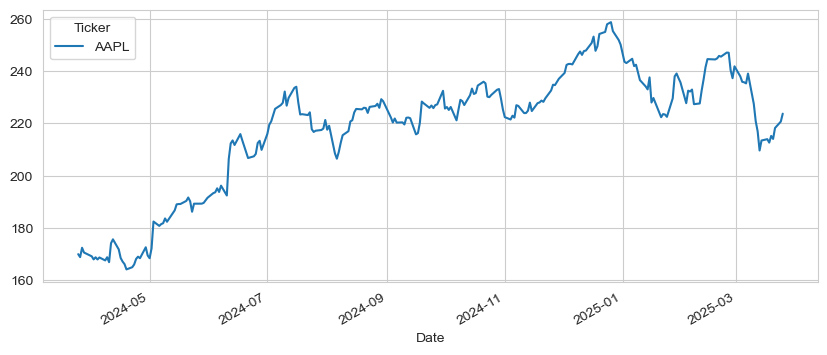

In [10]:
AAPL["Close"].plot(legend = True, figsize = (10, 4))
plt.show()

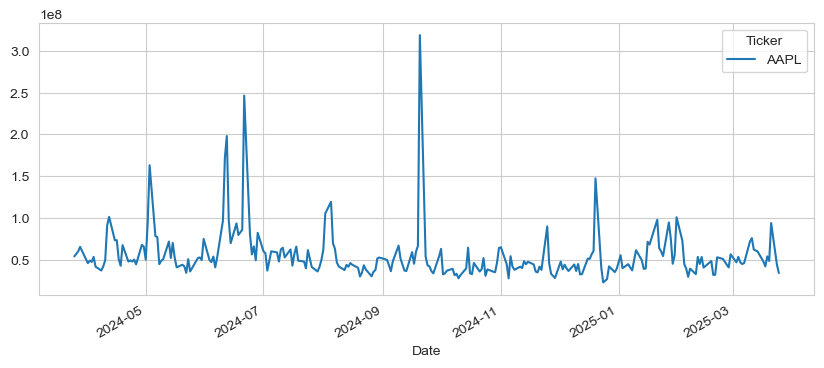

In [11]:
AAPL["Volume"].plot(legend = True, figsize = (10,4))
plt.show()

In [42]:
# ma = moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = DataFrame.rolling(AAPL['Close'], ma).mean()
    # AAPL[column_name] = pd.DataFrame.rolling(AAPL['Close'],window=ma).mean()

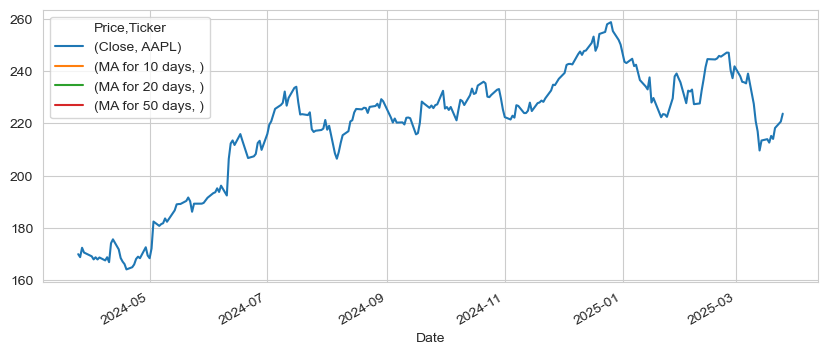

In [43]:
AAPL[["Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(subplots = False, figsize = (10, 4))
plt.show()

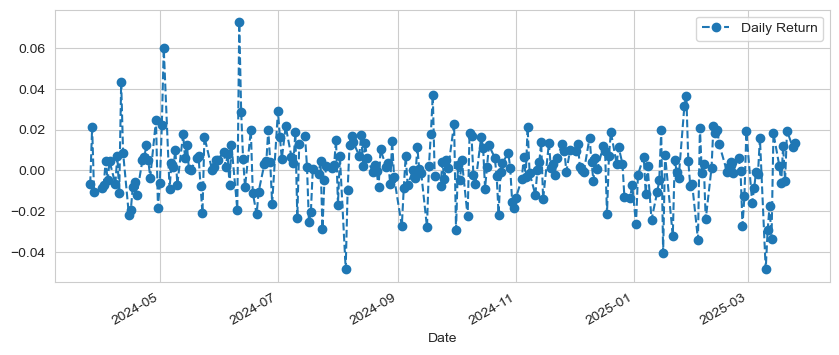

In [44]:
AAPL["Daily Return"] = AAPL["Close"].pct_change()

AAPL["Daily Return"].plot(figsize = (10, 4), legend = True, linestyle = "--", marker = "o")
plt.show()

C:\Users\jfhar\AppData\Local\Temp\ipykernel_17756\693099362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL["Daily Return"].dropna(), bins = 100, color = "purple")


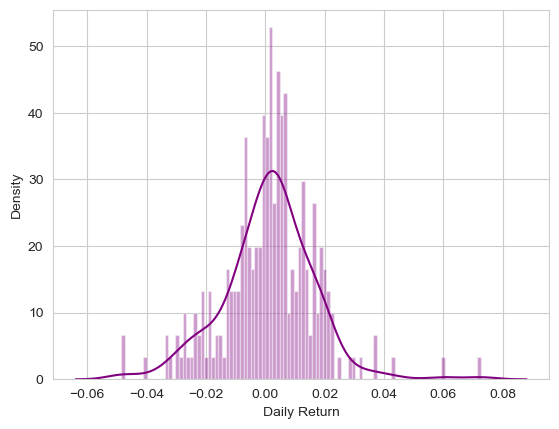

In [45]:
sns.distplot(AAPL["Daily Return"].dropna(), bins = 100, color = "purple")
plt.show()